# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [898]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data using a left join and arrange the columns as desired
mouse_data = pd.merge(study_results, mouse_metadata, on='Mouse ID', how='left')

# Display the data table for preview
mouse_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [899]:
# Checking the number of mice.
mouse_data['Mouse ID'].nunique()

249

In [900]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_rows = mouse_data[mouse_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

# Get the unique Mouse IDs from the duplicate rows
duplicate_mouse_ids = duplicate_rows['Mouse ID'].unique()

duplicate_mouse_ids


array(['g989'], dtype=object)

In [901]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_data = mouse_data[mouse_data['Mouse ID'].isin(duplicate_mouse_ids)]

duplicate_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [964]:
# Create a clean DataFrame by dropping duplicate mice by their IDs
clean_mouse_data = mouse_data.drop_duplicates(subset='Mouse ID', keep='first')

# Display the clean DataFrame
clean_mouse_data.head()





,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [965]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_data['Mouse ID'].count()

249

## Summary Statistics

In [966]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


# Group the clean_mouse_data DataFrame by 'Drug Regimen'
grouped_data = mouse_data.groupby('Drug Regimen')

# Calculate the mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_stats = grouped_data['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Rename columns
summary_stats = summary_stats.rename(columns={'mean': 'Mean Tumor Volume', 'median': 'Median Tumor Volume', 'var': 'Tumor Volume Variance', 'std': 'Tumor Volume Std. Dev.', 'sem': 'Tumor Volume Std. Err.'})

summary_stats






,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [967]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

# Calculate the mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_stats = mouse_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Reset the index 
summary_stats = summary_stats.reset_index()

# Organizing stats as collumns 
summary_stats_pivot = summary_stats.pivot_table(index='Drug Regimen', values=['mean', 'median', 'var', 'std', 'sem'])

summary_stats_pivot = summary_stats_pivot[['mean', 'median', 'var', 'std', 'sem']]

# Add Tumor Volume Header
summary_stats_pivot.columns = pd.MultiIndex.from_product([['Tumor Volume (mm3)'], summary_stats_pivot.columns])

summary_stats_pivot




Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

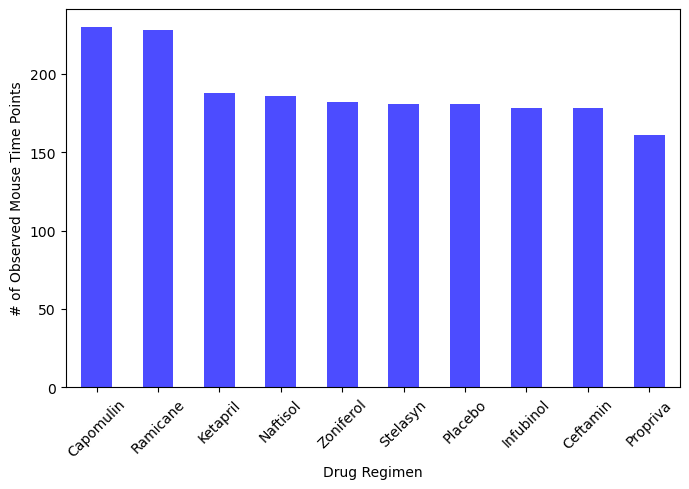

In [968]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# Group the data by 'Drug Regimen' and count the number of rows for each regimen
regimen_counts = mouse_data['Drug Regimen'].value_counts()

# Create a bar plot using Pandas
regimen_counts.plot(kind='bar', color='blue', alpha=0.7, figsize=(7, 5))

# Add labels a
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Time Points')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


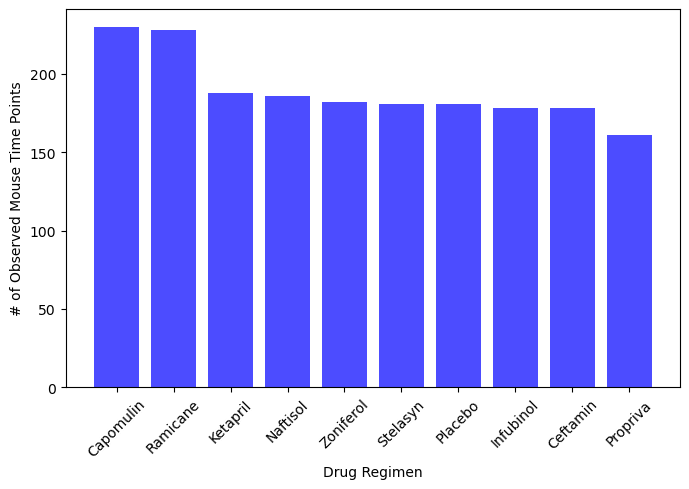

In [969]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Group the data by 'Drug Regimen' and count the number of rows for each regimen
regimen_counts = mouse_data['Drug Regimen'].value_counts()

# Extract regimen names and corresponding counts
regimens = regimen_counts.index
counts = regimen_counts.values

# Create a bar plot using pyplot
plt.figure(figsize=(7, 5))
plt.bar(regimens, counts, color='blue', alpha=0.7)

# Add labels 
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Time Points')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


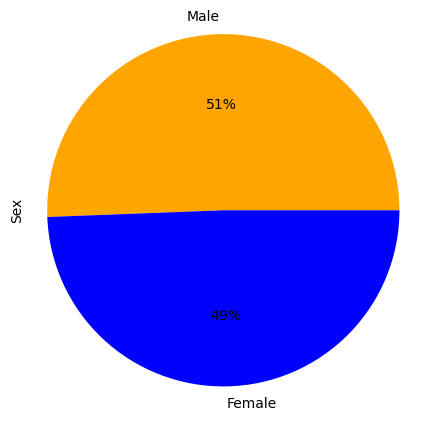

In [970]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Group the data by 'Sex' and count the number of mice in each category
sex_counts = mouse_data['Sex'].value_counts()

# Create a pie plot using Pandas
sex_counts.plot(kind='pie', autopct='%1.0f%%', colors=['orange', 'blue'], figsize=(5, 5))

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Show the plot
plt.show()


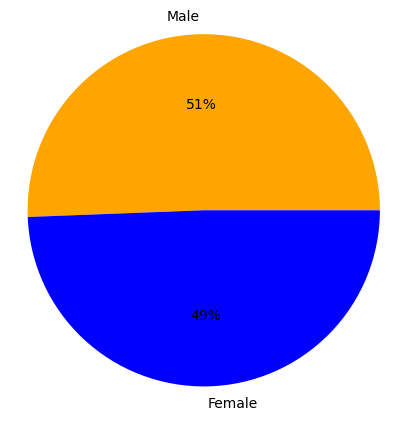

In [971]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Group the data by 'Sex' and count the number of mice in each category
sex_counts = mouse_data['Sex'].value_counts()

# Create a pie plot using pyplot
plt.figure(figsize=(5, 5))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.0f%%',  colors=['orange', 'blue'])

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Show the plot
plt.show()


## Quartiles, Outliers and Boxplots

In [972]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# List of treatment regimens 
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Filter the DataFrame to include only the selected treatment regimens
filtered_data = mouse_data[mouse_data['Drug Regimen'].isin(treatment_regimens)]

# Start by getting the last (greatest) timepoint for each mouse

max_timepoints = filtered_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge the group DataFrame with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(max_timepoints, filtered_data, on=['Mouse ID', 'Timepoint'], how='inner')

# Display the final tumor volume DataFrame
final_tumor_volume.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25


In [973]:
# List of treatment regimens
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create an empty list to store tumor volume data (for plotting)
tumor_volume_data = []

# Create a dictionary to store potential outliers
outliers = {}

# Loop through each treatment regimen
for treatment in treatments:
    # Filter the data to get the tumor volumes for the current regimen
    tumor_volumes = final_tumor_volume[final_tumor_volume['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    
    # Append the tumor volume data to the list for plotting
    tumor_volume_data.append(tumor_volumes)
    
    # Calculate quartiles and IQR
    quartiles = tumor_volumes.quantile([0.25, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    
    # Calculate lower and upper bounds for potential outliers
    lower_bound = lower_quartile - 1.5 * iqr
    upper_bound = upper_quartile + 1.5 * iqr
    
    # Determine potential outliers for the current regimen
    potential_outliers = tumor_volumes[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    
    # Store potential outliers in the dictionary
    outliers[treatment] = potential_outliers

# Print the potential outliers for each treatment regimen
for treatment, potential_outliers in outliers.items():
    if potential_outliers.empty:
        print(f"{treatment}'s potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)")
    else:
        print(f"{treatment}'s potential outliers:\n{potential_outliers}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers:
15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


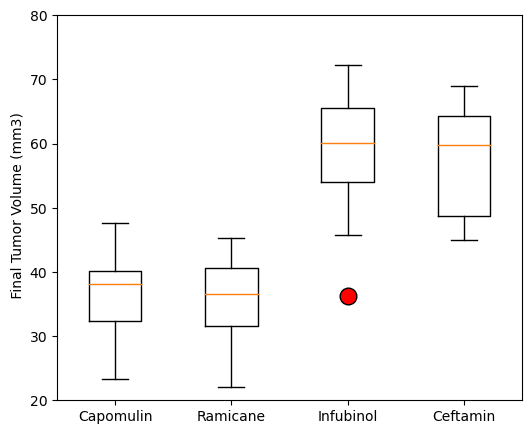

In [974]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
import matplotlib.pyplot as plt

# List of treatment regimens
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create a list to store tumor volume data for each treatment
tumor_volume_data = []

# Loop through each treatment regimen and extract tumor volume data
for treatment in treatments:
    tumor_volumes = final_tumor_volume[final_tumor_volume['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    tumor_volume_data.append(tumor_volumes)

# Create a box plot
plt.figure(figsize=(6, 5))
plt.boxplot(tumor_volume_data, labels=treatments, flierprops=dict(marker='o', markerfacecolor='red', markersize=12))
plt.ylabel(' Final Tumor Volume (mm3)')
plt.ylim(20, 80) 
plt.show()


## Line and Scatter Plots

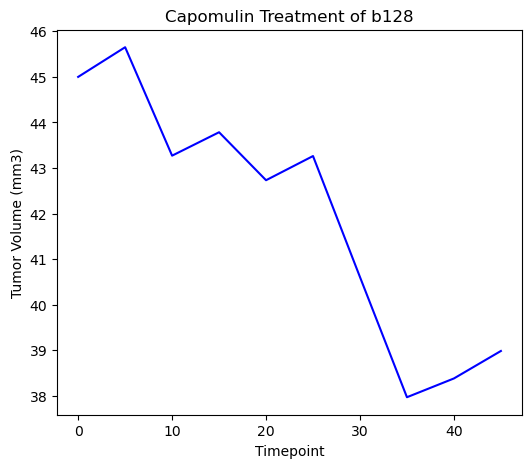

In [975]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

mouse_id = 'b128'

# Filter the data for the selected mouse and Capomulin treatment
capomulin_data = mouse_data[(mouse_data['Mouse ID'] == mouse_id) & (mouse_data['Drug Regimen'] == 'Capomulin')]

# Create a line plot
plt.figure(figsize=(6, 5))
plt.plot(capomulin_data['Timepoint'], capomulin_data['Tumor Volume (mm3)'], linestyle='-', color='blue')
plt.title(f'Capomulin Treatment of {mouse_id}')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.show()


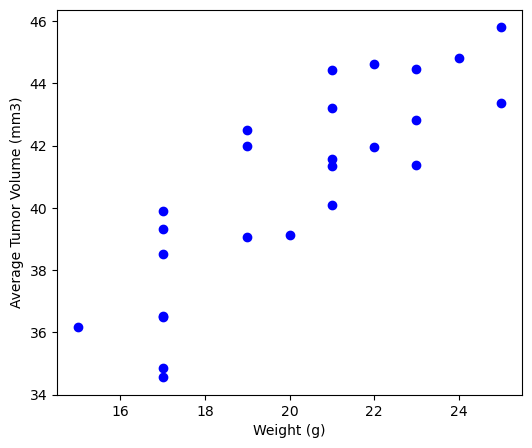

In [976]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Filter the data for the Capomulin regimen
capomulin_data = mouse_data[mouse_data['Drug Regimen'] == 'Capomulin']

# Group the data by mouse ID and calculate the average tumor volume and weight
average_data = capomulin_data.groupby('Mouse ID').agg({'Tumor Volume (mm3)': 'mean', 'Weight (g)': 'first'}).reset_index()

# Create a scatter plot
plt.figure(figsize=(6, 5))
plt.scatter(average_data['Weight (g)'], average_data['Tumor Volume (mm3)'], marker='o', color='blue')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


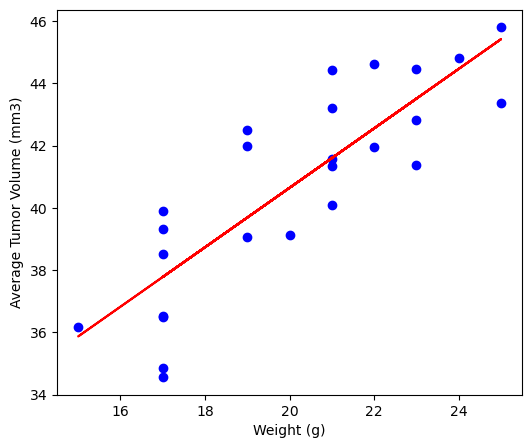

In [977]:
import scipy.stats as st
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Filter the data for the Capomulin regimen
capomulin_data = mouse_data[mouse_data['Drug Regimen'] == 'Capomulin']

# Group the data by mouse ID and calculate the average tumor volume and weight
average_data = capomulin_data.groupby('Mouse ID').agg({'Tumor Volume (mm3)': 'mean', 'Weight (g)': 'first'}).reset_index()

# Calculate the correlation coefficient and a linear regression model 
correlation_coefficient = st.pearsonr(average_data['Weight (g)'], average_data['Tumor Volume (mm3)'])[0]

print(f"The correlation between mouse weight and the average tumor volume is {correlation_coefficient:.2f}")

plt.figure(figsize=(6, 5))
plt.scatter(average_data['Weight (g)'], average_data['Tumor Volume (mm3)'], marker='o', color='blue', label='Data Points')

slope, intercept, r_value, p_value, std_err = linregress(average_data['Weight (g)'], average_data['Tumor Volume (mm3)'])
predictions = slope * average_data['Weight (g)'] + intercept
plt.plot(average_data['Weight (g)'], predictions, color='red', label='Regression Line')

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()
